In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from nltk.corpus import stopwords, gutenberg
from collections import Counter
import re
import scipy
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
per_15 = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
          'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
          'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
          'younger_sister_anon', 'st_stephen_anon']
per_16_17 = ['phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope']
per_18 = ['america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
          '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
          'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
          'darkness_byron', 'dear_doctor_byron']
per_19_1 =['of_mere_stevens', 'snowman_stevens', 'key_west_stevens', 'modern_poetry_stevens', 
           'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
           'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
           'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
           'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings']
per_19_2 = [ 'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 
             'sunflower_ginsberg', 'america_ginsberg', 'fever_plath', 
             'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 
             'phenom_woman_angelou','personal_ohara', 'ave_maria_ohara', 'the_day_ohara']

files = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
            'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
            'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
             'younger_sister_anon', 'st_stephen_anon', 'phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope','america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
         '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
         'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
         'darkness_byron', 'dear_doctor_byron', 'of_mere_stevens', 'snowman_stevens', 
         'key_west_stevens', 'modern_poetry_stevens', 
         'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
         'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
          'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
         'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings',  'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 'sunflower_ginsberg', 'america_ginsberg',
             'fever_plath', 'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 'phenom_woman_angelou',
             'personal_ohara', 'ave_maria_ohara', 'the_day_ohara']
         

In [3]:
filedata = {file: open('C:\\Users\\justf\\Desktop\\txtfiles\\' + file + '.txt', 'r') for file 
            in files}

In [4]:
author = []
title = []
period = []
columns = []
text = []

In [5]:
def text_and_split(files):
    
    for file in files:
        poem = filedata[file].read()
        split = file.split('_')
        name = split[-1]
        work = split[:-1]
        text.append(poem)
        author.append(name)
        title.append(work)

In [6]:
text_and_split(per_15)

In [7]:
text_and_split(per_16_17)

In [8]:
text_and_split(per_18)

In [9]:
text_and_split(per_19_1)

In [10]:
text_and_split(per_19_2
              )

In [11]:
col_per = ['period 15','period 15','period 15','period 15','period 15',
           'period 15','period 15','period 15','period 15','period 15','period 15','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18','period 19_1', 
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_2', 'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2']

In [12]:
def cleaner(text):
    text = re.sub('[ï»¿]', '', text)
    text = re.sub('[â€™]', '', text)
    text = re.sub('[ã©]', '', text)
    text = text.lower()
    return text

In [13]:
clean_text = []
for i in range(len(text)):
    clean = cleaner(text[i])
    clean_text.append(clean)

In [14]:
line_splits = []
for i in range(76):
    lines = clean_text[i].split('\n\n')
    line_splits.append(lines)

In [15]:
line_split_clean = []
for i in range(len(line_splits)):
    for j in range(len(line_splits[i])):
        lines = ' '.join(line_splits[i][j].split())
        line_split_clean.append(lines)

In [16]:
period = col_per

In [17]:
df = pd.DataFrame({'poem':clean_text, 'author': author, 'period': period, 'title': title})

In [18]:
title_join = []
for i in range(len(title)):
    work = ''.join(title[i])
    title_join.append(work)

In [19]:
df['title'] = title_join

In [20]:
df_2 = pd.DataFrame(line_splits)
df_2['title'] = title_join

In [32]:
df_3 = pd.merge(df, df_2, on='title')

In [33]:
df_3 = df_3.set_index('title')

In [34]:
df_ant = df_3[['author', 'period']]

In [35]:
set_index = df_3.drop(['poem', 'period', 'author'], axis=1)

In [36]:
set_index = set_index.stack()

In [37]:
set_index = set_index.to_frame()

In [42]:
stanza_df = pd.merge(df_ant, set_index, how='right', on='title')

In [43]:
stanza_df.head()

,author,period,0
title,,,
truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes..."
truth,chaucer,period 15,"tempest the nought al croked to redresse,\nin ..."
truth,chaucer,period 15,"that the is sent, receyve in buxumnesse;..."
truth,chaucer,period 15,"therfore, thou vache, leve thine olde wr..."
torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne\nas fer as ..."


In [44]:
stanza_df.columns = ['author', 'period', 'stanza']

In [45]:
stanza_df.reset_index(inplace=True)

In [46]:
stanza_df.iloc[:,3] = stanza_df.iloc[:,3].astype('str')

In [47]:
cleaned = []
for i in range(len(stanza_df)):
    clean = ' '.join(stanza_df.iloc[i,3].split())
    cleaned.append(clean)

In [48]:
stanza_df.iloc[:,3] = cleaned

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [213]:
tfidf = vectorizer.fit_transform(stanza_df.iloc[:,3].values)

In [214]:
from sklearn.cluster import KMeans

num_clusters = 7
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(tfidf)

clusters = km.labels_.tolist()

Wall time: 1.66 s


In [215]:
km.cluster_centers_.shape

(7, 1832)

In [216]:
tfidf.shape

(462, 1832)

In [59]:
centers = km.cluster_centers_

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [61]:
import matplotlib as mpl
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2,  dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [130]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=stanza_df.iloc[:,2])) 
groups = df.groupby('label')

In [131]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'} #3: '#e7298a',
#                   4:'#BDB76B'}
#         5:'#FFD700', 6: '#00FF00', 7:'#FAA460'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three'}
#                  3: 'Four',
#                  4: 'Five'}

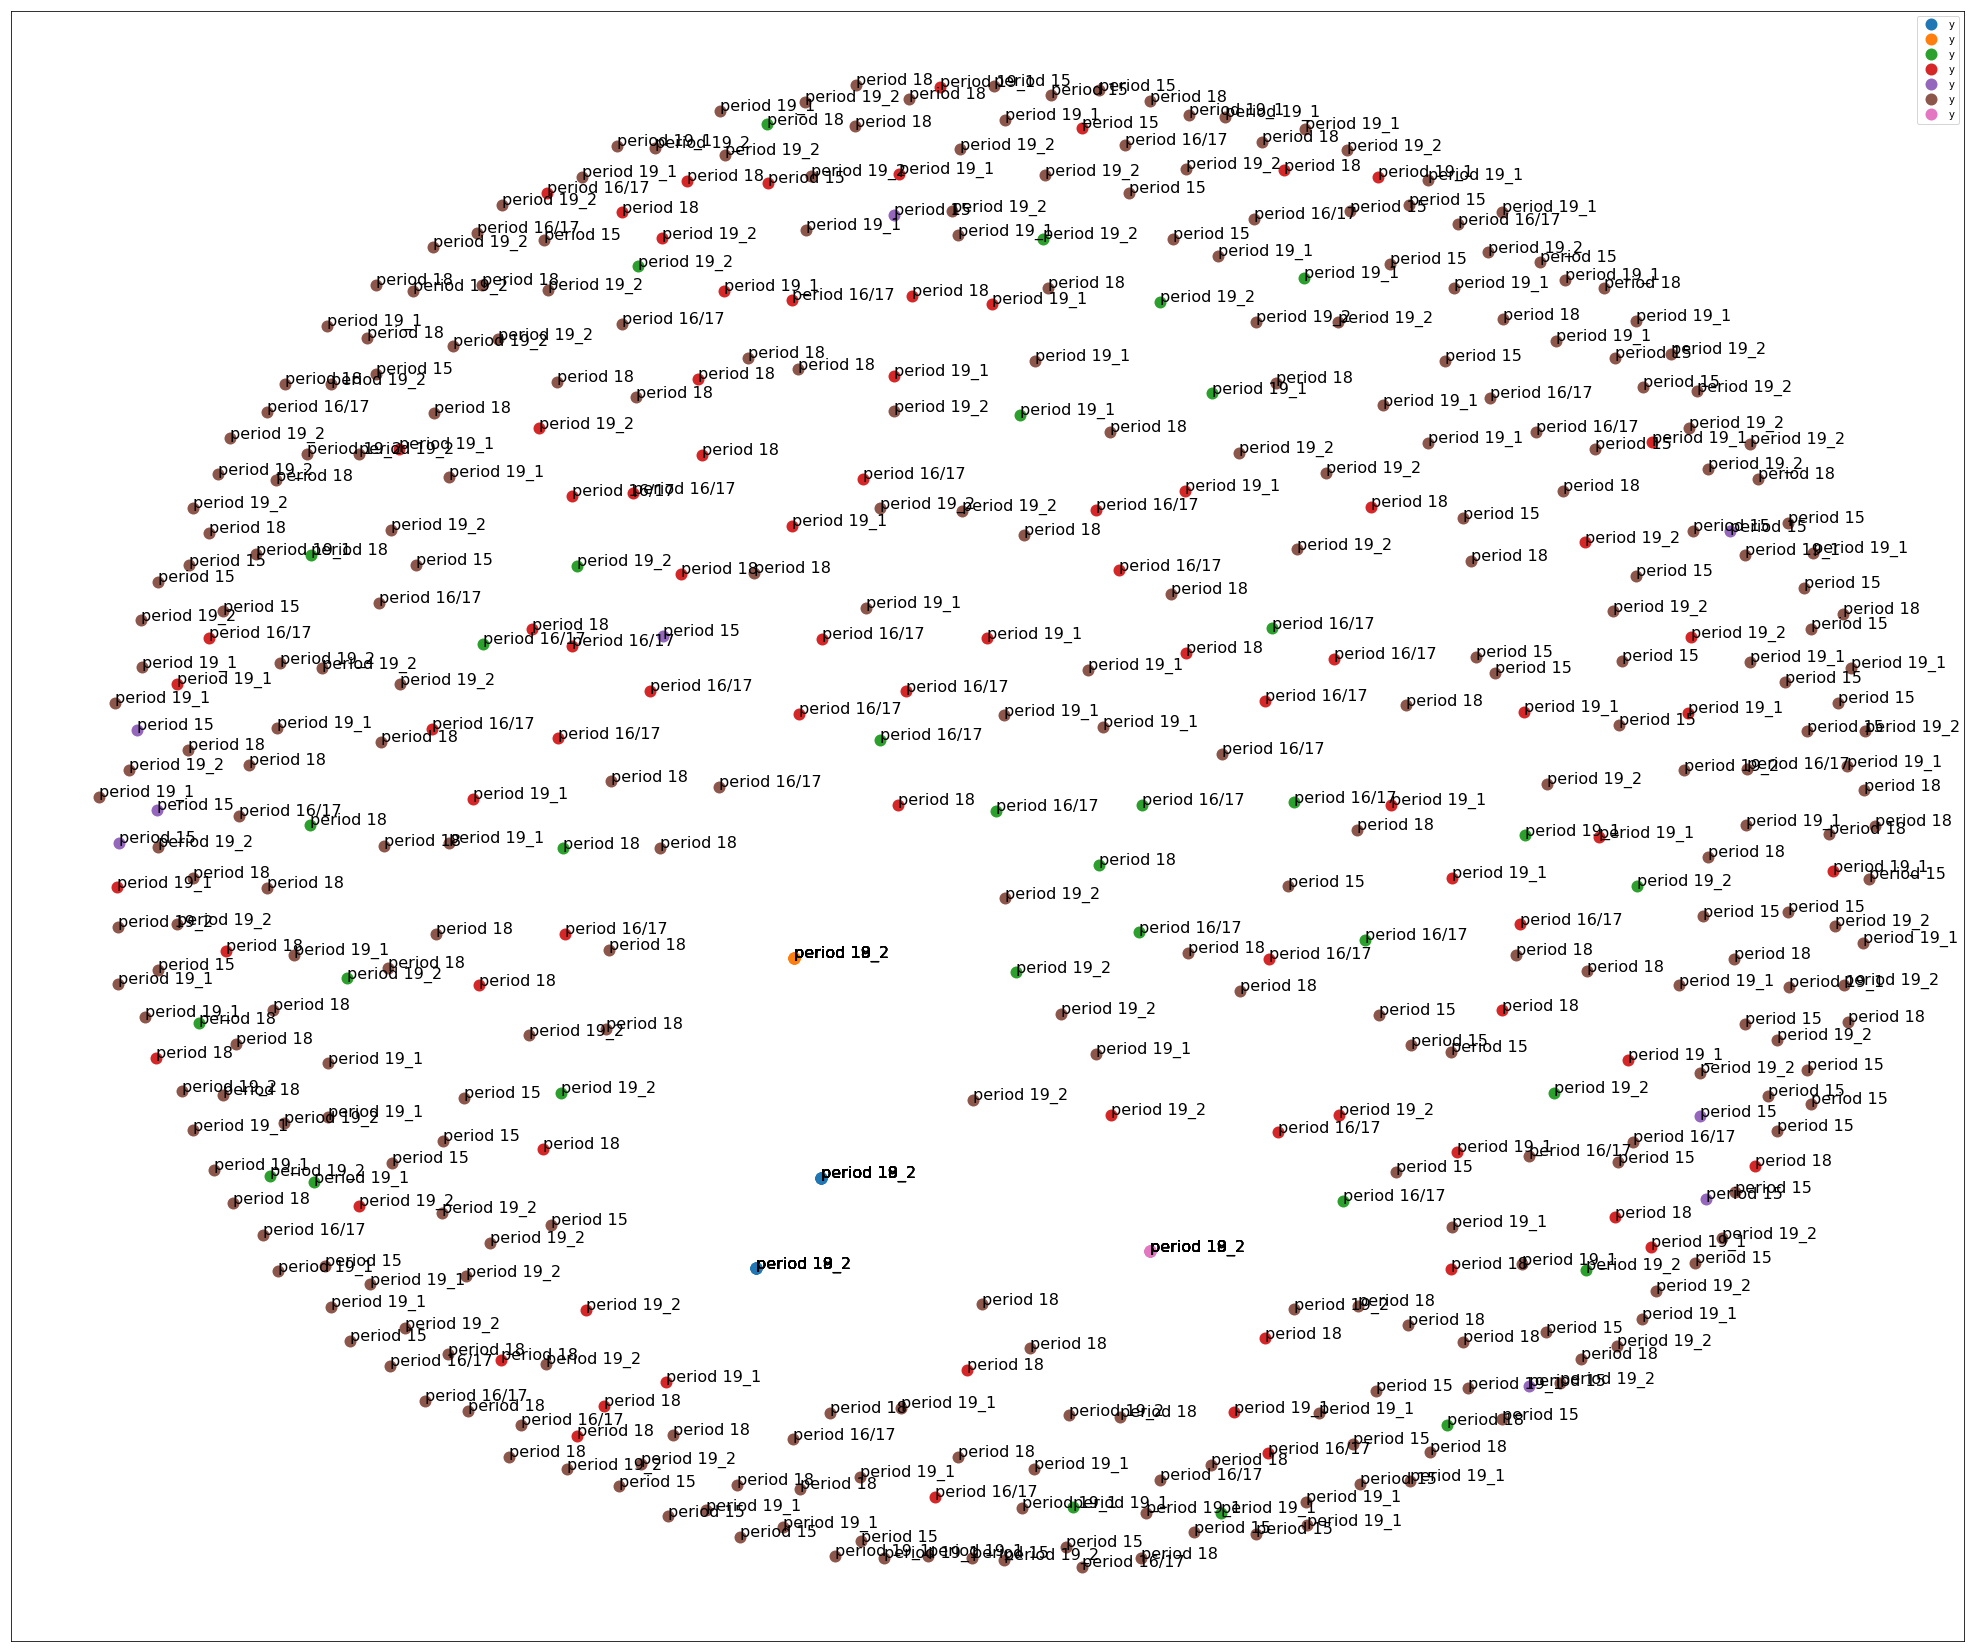

In [132]:
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
#             label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=16)  

    
    
plt.show() #show the plot

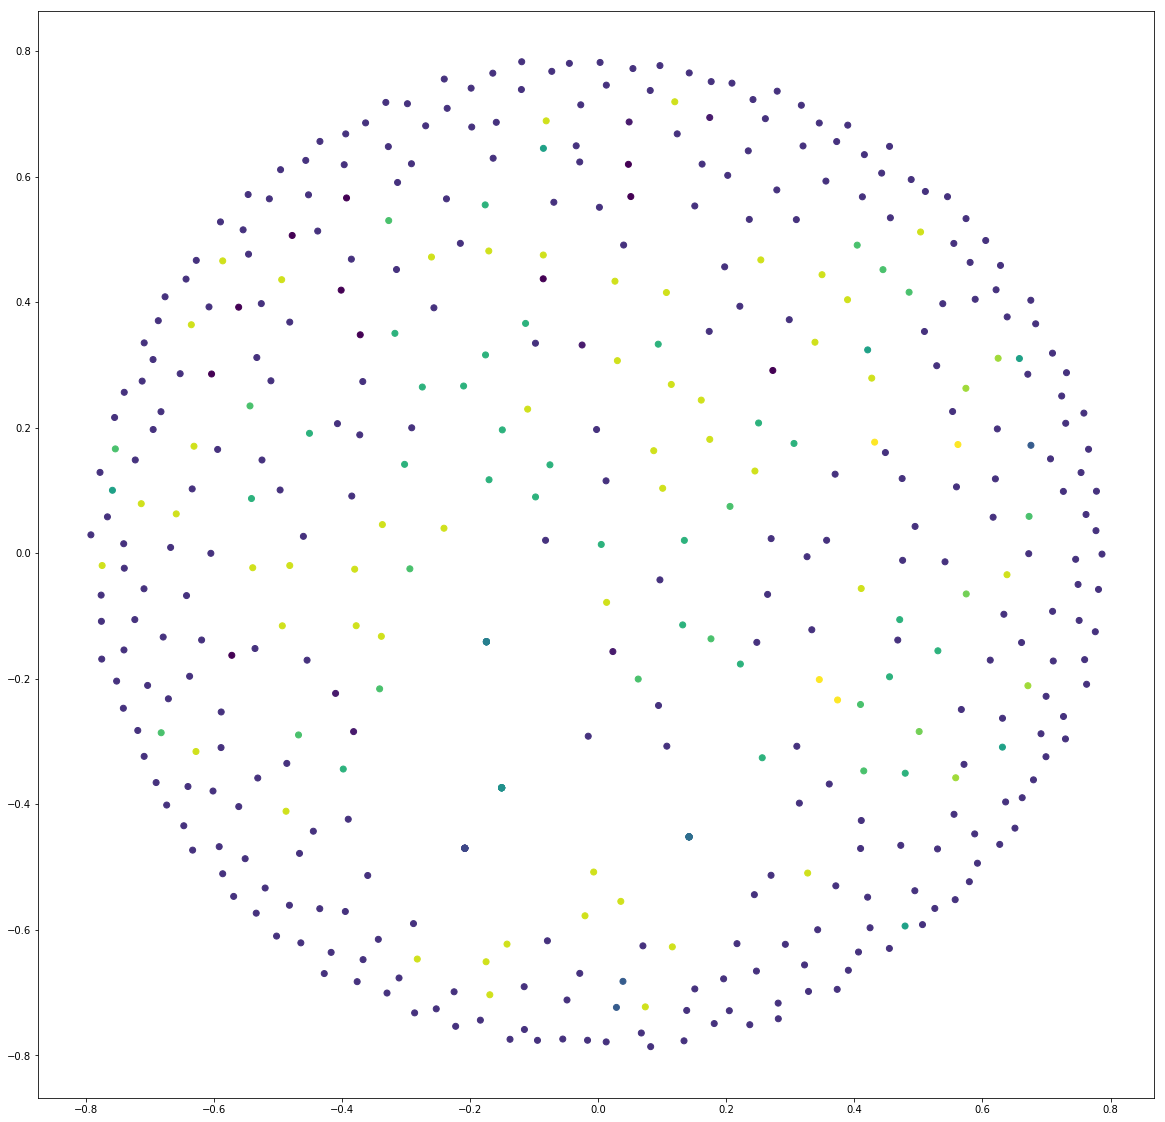

In [670]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=15

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(tfidf)

#Predicted clusters.
predict=sc.fit_predict(tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict)
plt.show()


In [672]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(tfidf)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 15


NameError: name 'cycle' is not defined

In [142]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=12, batch_size= 300, max_iter=10000, init='k-means++', random_state=24)
X = mbk.fit_transform(tfidf)
mini_clusters = mbk.labels_.tolist()

In [143]:
xs_mini, ys_mini = pos[:, 0], pos[:, 1]
df_mini = pd.DataFrame(dict(x=xs, y=ys, label=mini_clusters, title=stanza_df.iloc[:,1])) 
groups_mini = df_mini.groupby('label')

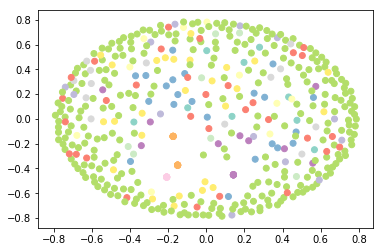

In [144]:
plt.scatter(xs, ys, c=mini_clusters, cmap='Set3')
plt.show()

In [77]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [76]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [79]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in stanza_df.iloc[:,3]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [80]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 29258 items in vocab_frame


In [169]:
vocab_frame.shape

(29258, 1)

In [133]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

In [191]:
 for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    print()
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
    print()

Cluster 0:
 america
 im
 russians
 dont
 wants
 read
 good
 want
 mind
 right

Cluster 1:
 millions
 resources
 national
 catholic
 fact
 flowerpots
 institutions
 literature
 abolished
 unpublishable

Cluster 2:
 shall
 body
 captain
 rise
 caged
 lies
 bird
 thou
 soul
 fallen

Cluster 3:
 thy
 know
 let
 world
 spring
 smile
 thou
 thee
 life
 smiles

Cluster 4:
 kyng
 alle
 herowdes
 halle
 stevene
 quat
 mete
 werkes
 forsak
 beter

Cluster 5:
 love
 ye
 like
 white
 sea
 night
 rise
 moon
 death
 water

Cluster 6:
 equal
 grown
 capable
 ungrown
 daughters
 sons
 endeard
 towering
 ample
 enduring



In [320]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(190)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
lsa_fit = lsa.fit_transform(tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(lsa_fit,index=stanza_df.loc[:,'stanza'])
for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:6])

Percent variance captured by all components: 72.51941735273361
Component 0:
stanza
america ive given you all and now im nothing. america two dollars and twentyseven cents january 17, 1956. i cant stand my own mind. america when will we end the human war? go fuck yourself with your atom bomb. i dont feel good dont bother me. i wont write my poem till im in my right mind. america when will you be angelic? when will you take off your clothes? when will you look at yourself through the grave? when will you be worthy of your million trotskyites? america why are your libraries full of tears? america when will you send your eggs to india? im sick of your insane demands. when can i go into the supermarket and buy what i need with my good looks? america after all it is you and i who are perfect not the next world. your machinery is too much for me. you made me want to be a saint. there must be some other way to settle this argument. burroughs is in tangiers i dont think hell come back its sinis

Name: 0, dtype: float64
Component 1:
stanza
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.973089
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.973089
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.973089
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capa

Name: 3, dtype: float64
Component 4:
stanza
america how can i write a holy litany in your silly mood? i will continue like henry ford my strophes are as individual as his automobiles more so theyre all different sexes. america i will sell you strophes $2500 apiece $500 down on your old strophe america free tom mooney america save the spanish loyalists america sacco & vanzetti must not die america i am the scottsboro boys. america when i was seven momma took me to communist cell meetings they sold us garbanzos a handful per ticket a ticket costs a nickel and the speeches were free everybody was angelic and sentimental about the workers it was all so sincere you have no idea what a good thing the party was in 1835 scott nearing was a grand old man a real mensch mother bloor the silk-strikers ewig-weibliche made me cry i once saw the yiddish orator israel amter plain. everybody must have been a spy. america you dont really want to go to war. america its them bad russians. them russians th

Name: 4, dtype: float64
Component 5:
stanza
farewell! thou art too dear for my possessing, and like enough thou knowst thy estimate. the charter of thy worth gives thee releasing; my bonds in thee are all determinate. for how do i hold thee but by thy granting, and for that riches where is my deserving? the cause of this fair gift in me is wanting, and so my patent back again is swerving. thy self thou gav'st, thy own worth then not knowing, or me, to whom thou gav'st it, else mistaking, so thy great gift, upon misprision growing, comes home again, on better judgement making. thus have i had thee as a dream doth flatter: in sleep a king, but waking no such matter.                                                                                                                                                                                                                                                                                                                                        

Name: 6, dtype: float64
Component 7:
stanza
white godiva, i unpeel” dead hands, dead stringencies.                                                                    0.508629
each dead child coiled, a white serpent, one at each little                                                               0.469582
the woman is perfected. her dead                                                                                          0.440499
beside the white chickens                                                                                                 0.334903
i never hear that one is dead without the chance of life afresh annihilating me that mightiest belief,                    0.307810
beliefs are bandaged, like the tongue when terror were it told in any tone commensurate would strike us instant dead -    0.287673
Name: 7, dtype: float64
Component 8:
stanza
ywis ye deal uncourteously; what, would ye frumple me? now fy! what, and ye shall be my pigesnye? by christ, ye shall not, no 

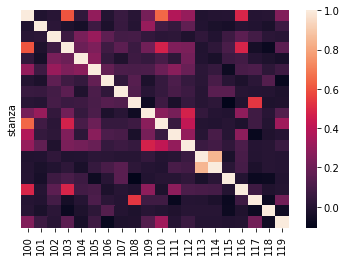

Key:
0 farewell! thou art too dear for my possessing, and like enough thou knowst thy estimate. the charter of thy worth gives thee releasing; my bonds in thee are all determinate. for how do i hold thee but by thy granting, and for that riches where is my deserving? the cause of this fair gift in me is wanting, and so my patent back again is swerving. thy self thou gav'st, thy own worth then not knowing, or me, to whom thou gav'st it, else mistaking, so thy great gift, upon misprision growing, comes home again, on better judgement making. thus have i had thee as a dream doth flatter: in sleep a king, but waking no such matter.
1 no longer mourn for me when i am dead than you shall hear the surly sullen bell give warning to the world that i am fled from this vile world with vilest worms to dwell; nay, if you read this line, remember not the hand that writ it; for i love you so, that i in your sweet thoughts would be forgot, if thinking on me then should make you woe. o, if (i say) you 

5 hence loathed melancholy, of cerberus, and blackest midnight born, in stygian cave forlorn, 'mongst horrid shapes, and shrieks, and sights unholy; find out some uncouth cell, where brooding darkness spreads his jealous wings, and the night-raven sings; there under ebon shades, and low-brow'd rocks, as ragged as thy locks, in dark cimmerian desert ever dwell. but come thou goddess fair and free, in heav'n yclep'd euphrosyne, and by men, heart-easing mirth, whom lovely venus at a birth with two sister graces more to ivy-crowned bacchus bore; or whether (as some sager sing) the frolic wind that breathes the spring, zephyr, with aurora playing, as he met her once a-maying, there on beds of violets blue, and fresh-blown roses wash'd in dew, fill'd her with thee, a daughter fair, so buxom, blithe, and debonair. haste thee nymph, and bring with thee jest and youthful jollity, quips and cranks, and wanton wiles, nods, and becks, and wreathed smiles, such as hang on hebe's cheek, and love to 

10 what can atone (oh ever-injur'd shade!) thy fate unpitied, and thy rites unpaid? no friend's complaint, no kind domestic tear pleas'd thy pale ghost, or grac'd thy mournful bier. by foreign hands thy dying eyes were clos'd, by foreign hands thy decent limbs compos'd, by foreign hands thy humble grave adorn'd, by strangers honour'd, and by strangers mourn'd! what though no friends in sable weeds appear, grieve for an hour, perhaps, then mourn a year, and bear about the mockery of woe to midnight dances, and the public show? what though no weeping loves thy ashes grace, nor polish'd marble emulate thy face? what though no sacred earth allow thee room, nor hallow'd dirge be mutter'd o'er thy tomb? yet shall thy grave with rising flow'rs be drest, and the green turf lie lightly on thy breast: there shall the morn her earliest tears bestow, there the first roses of the year shall blow; while angels with their silver wings o'ershade the ground, now sacred by thy reliques made.
11 so peace

In [211]:
similarity = np.asarray(np.asmatrix(lsa_fit) * np.asmatrix(lsa_fit).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=stanza_df.loc[:,'stanza']).iloc[100:120,100:120]
#Making a plot
ax = sns.heatmap(sim_matrix, yticklabels=False)
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(20):
    print(i,sim_matrix.index[i])

In [182]:
col_spacy = []
bow_list = []
for i in range(len(stanza_df)):
    n = nlp(stanza_df.iloc[i,3])
    bow = bag_of_words(n)
    col_spacy.append(n)
    bow_list.append(bow)

In [183]:
bow_list

[['pre',
  'hath',
  'schal',
  'fle',
  'fro',
  'dwelle',
  'sothefastnesse',
  'suffise',
  'thin',
  'owen',
  'thing',
  'thei',
  'smal',
  'hord',
  'hate',
  'clymbyng',
  'tykelnesse',
  'envye',
  'wele',
  'blent',
  'overal',
  'savour',
  'thanne',
  'byhove',
  'reule',
  'weel',
  'thiself',
  'folk',
  'canst',
  'reede',
  'trouthe',
  'delyvere',
  'drede'],
 ['al',
  'tempest',
  'nought',
  'crok',
  'redresse',
  'trust',
  'hire',
  'tourneth',
  'bal',
  'myche',
  'wele',
  'stant',
  'litel',
  'besynesse',
  'bywar',
  'therfore',
  'spurne',
  'ayeyns',
  'stryve',
  'doth',
  'crokke',
  'wal',
  'daunte',
  'thiself',
  'daunt',
  'othere',
  'dede',
  'trouthe',
  'shal',
  'delyvere',
  'drede'],
 ['forth',
  'thi',
  'send',
  'receyve',
  'buxumnesse',
  'wrestlyng',
  'worlde',
  'axeth',
  'fal',
  'non',
  'home',
  'nys',
  'wyldernesse',
  'pylgryme',
  'beste',
  'stal',
  'know',
  'contrã',
  'loke',
  'thonk',
  'god',
  'al',
  'hold',
  'heye

In [151]:
stanza_df['spacy'] = col_spacy

In [185]:
stanza_df['words'] = bow_list

In [186]:
stanza_df.head()

,title,author,period,stanza,spacy,words
0,truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes...","(fle, fro, the, pres, ,, and, dwelle, with, so...","[pre, hath, schal, fle, fro, dwelle, sothefast..."
1,truth,chaucer,period 15,"tempest the nought al croked to redresse, in t...","(tempest, the, nought, al, croked, to, redress...","[al, tempest, nought, crok, redresse, trust, h..."
2,truth,chaucer,period 15,"that the is sent, receyve in buxumnesse; the w...","(that, the, is, sent, ,, receyve, in, buxumnes...","[forth, thi, send, receyve, buxumnesse, wrestl..."
3,truth,chaucer,period 15,"therfore, thou vache, leve thine olde wrechedn...","(therfore, ,, thou, vache, ,, leve, thine, old...","[leve, unto, hym, therfore, thou, vache, thine..."
4,torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne as fer as c...","(madame, ,, ye, ben, of, al, beaute, shryne, a...","[ye, ben, madame, al, beaute, shryne, fer, cer..."


In [159]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [173]:
temp = stanza_df.iloc[:,4]

for token in temp:
    print(token)
    if not token.is_punct:
        print(token)

# allwords = [token.lemma_
#             for token in text
#             if not token.is_punct
#             and not token.is_stop]

fle fro the pres, and dwelle with sothefastnesse, suffise thin owen thing, thei it be smal; for hord hath hate, and clymbyng tykelnesse, prees hath envye, and wele blent overal. savour no more thanne the byhove schal; reule weel thiself, that other folk canst reede; and trouthe schal delyvere, it is no drede.


AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'is_punct'

In [174]:
temp[0]

fle fro the pres, and dwelle with sothefastnesse, suffise thin owen thing, thei it be smal; for hord hath hate, and clymbyng tykelnesse, prees hath envye, and wele blent overal. savour no more thanne the byhove schal; reule weel thiself, that other folk canst reede; and trouthe schal delyvere, it is no drede.

In [175]:
stanza_df[0:4]

,title,author,period,stanza,spacy
0,truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes...","(fle, fro, the, pres, ,, and, dwelle, with, so..."
1,truth,chaucer,period 15,"tempest the nought al croked to redresse, in t...","(tempest, the, nought, al, croked, to, redress..."
2,truth,chaucer,period 15,"that the is sent, receyve in buxumnesse; the w...","(that, the, is, sent, ,, receyve, in, buxumnes..."
3,truth,chaucer,period 15,"therfore, thou vache, leve thine olde wrechedn...","(therfore, ,, thou, vache, ,, leve, thine, old..."


In [176]:
type(stanza_df[0:0])

pandas.core.frame.DataFrame

In [178]:
stanza_df[0:4].dtypes

title     object
author    object
period    object
stanza    object
spacy     object
dtype: object

In [179]:
type(temp)

pandas.core.series.Series

In [181]:
type(stanza_df.iloc[4][0])

str

In [220]:
stanza_df['tfidfvect'] = list(tfidf)

In [221]:
stanza_df.head()

,title,author,period,stanza,spacy,words,tfidfvect
0,truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes...","(fle, fro, the, pres, ,, and, dwelle, with, so...","[pre, hath, schal, fle, fro, dwelle, sothefast...","(0, 595)\t0.2161319388271957\n (0, 1590)\t0..."
1,truth,chaucer,period 15,"tempest the nought al croked to redresse, in t...","(tempest, the, nought, al, croked, to, redress...","[al, tempest, nought, crok, redresse, trust, h...","(0, 1741)\t0.2531161139425187\n (0, 1595)\t..."
2,truth,chaucer,period 15,"that the is sent, receyve in buxumnesse; the w...","(that, the, is, sent, ,, receyve, in, buxumnes...","[forth, thi, send, receyve, buxumnesse, wrestl...","(0, 1648)\t0.17784410917694973\n (0, 386)\t..."
3,truth,chaucer,period 15,"therfore, thou vache, leve thine olde wrechedn...","(therfore, ,, thou, vache, ,, leve, thine, old...","[leve, unto, hym, therfore, thou, vache, thine...","(0, 1327)\t0.21583591420318687\n (0, 1648)\..."
4,torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne as fer as c...","(madame, ,, ye, ben, of, al, beaute, shryne, a...","[ye, ben, madame, al, beaute, shryne, fer, cer...","(0, 23)\t0.15258636675754156\n (0, 1686)\t0..."


In [225]:
from sklearn.ensemble import RandomForestClassifier

In [294]:
X = df_class.iloc[:,1:1833]
y = df_class.iloc[:,0]

In [296]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X, y)

In [298]:
rfc.score(X, y)

0.9437229437229437

In [228]:
zipped = zip(tfidf)

In [231]:
type(zipped)

zip

In [233]:
tfidf_array = tfidf.toarray()

In [240]:
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df['author'] = stanza_df['author']

In [257]:
df_w_tfidf = pd.merge(stanza_df, tfidf_df, left_index=True, right_index=True)

In [258]:
df_w_tfidf.shape

(462, 1840)

In [270]:
df_w_tfidf = df_w_tfidf.drop(columns=['tfidfvect', 'spacy'])

In [275]:
df_w_tfidf.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [277]:
author_dummies = pd.get_dummies(df_w_tfidf['author_x'])

In [279]:
df_w_tfidf = pd.merge(df_w_tfidf, author_dummies, right_index=True, left_index=True)

In [281]:
df_w_tfidf.head()

,title,author_x,period,stanza,words,0,1,2,3,4,...,kipling,milton,ohara,plath,pope,shakespeare,skelton,stevens,wcw,whitman
0,truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes...","[pre, hath, schal, fle, fro, dwelle, sothefast...",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,truth,chaucer,period 15,"tempest the nought al croked to redresse, in t...","[al, tempest, nought, crok, redresse, trust, h...",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,truth,chaucer,period 15,"that the is sent, receyve in buxumnesse; the w...","[forth, thi, send, receyve, buxumnesse, wrestl...",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,truth,chaucer,period 15,"therfore, thou vache, leve thine olde wrechedn...","[leve, unto, hym, therfore, thou, vache, thine...",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne as fer as c...","[ye, ben, madame, al, beaute, shryne, fer, cer...",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
df_class = df_w_tfidf.drop(columns=['title', 'period', 'stanza', 'words'])

In [283]:
df_class.head()

,author_x,0,1,2,3,4,5,6,7,8,...,kipling,milton,ohara,plath,pope,shakespeare,skelton,stevens,wcw,whitman
0,chaucer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,chaucer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,chaucer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,chaucer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,chaucer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X, y)

In [300]:
train.score(X,y)

0.7857142857142857

In [303]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
train = clf.fit(X, y)

In [304]:
clf.score(X,y)

0.935064935064935

In [305]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [306]:
bnb.score(X,y)

0.23809523809523808

In [319]:
print(*stanza_df['title'])

truth truth truth truth torosemounde torosemounde torosemounde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde troiluscriseyde phillipsparrow phillipsparrow phillipsparrow phillipsparrow phillipsparrow phillipsparrow phillipsparrow phillipsparrow phillipsparrow mannerly mannerly mannerly mannerly mistresshussey mistresshussey tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming tunningrumming womanhood womanhood womanhood womanhood womanhood blownortherne blownortherne blownortherne blownortherne blownortherne blownortherne blownortherne blownortherne youngersister youngersister youngersister youngersister youngersister youngersister youngersister ststephen ststephen ststephen ststephen ststephen ststephen ststephen ststephen ststephen s

,x,y,label,title
0,0.709436,0.318985,5,period 15
1,0.699239,-0.324017,5,period 15
2,-0.197195,0.679292,3,period 15
3,0.709558,-0.092388,5,period 15
4,-0.485881,-0.334666,5,period 15
